Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
from plotting import raincloud
from scipy.stats import norm, sem, t

sns.set_context('notebook')

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
outputpath = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(), os.pardir)),
    'data')

In [3]:
def plot_parameters(df, title):
    fig, axs = plt.subplots(2, 1, figsize=(4, 8), sharey='row')

    for i, metric in enumerate(['Threshold', 'Slope']):
        raincloud(data=df, x='Modality', y=metric, ax=axs[i], palette=['#4c72b0', '#c44e52'], levels=['Extero', 'Intero'])
        labels = [item.get_text() for item in axs[i].get_xticklabels()]
        labels[0] = 'Exteroception'
        labels[1] = 'Interoception'
        axs[i].set_xticklabels(labels, size=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', axis='y',linestyle='--')
        axs[i].tick_params(axis='x', which='minor', bottom=False)

    axs[1].set_ylabel('Slope', size=15)
    axs[0].set_ylabel('Threshold', size=15)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=300)

In [4]:
def plot_psychometricFunctions(df, title):

    fig, axs = plt.subplots(2, 1, figsize=(6, 8))
    for i, modality, col in zip((0, 1), ['Intero', 'Extero'], ['#c44e52', '#4c72b0']):
        threshold, slope = [], []
        for subject in df.Subject.unique():
            threshold.append(df.Threshold[(behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)
            slope.append(df.Slope[(behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)

            # Plot Psi estimate of psychometric function
            axs[i].plot(np.linspace(-40, 40, 500), 
                    (norm.cdf(np.linspace(-40, 40, 500), loc=threshold[-1], scale=slope[-1])),
                    '-', color='gray', alpha=.05)
            axs[i].set_ylabel('P$_{(Response=Faster)}$', size=12)
            axs[i].set_xlabel('Intensity ($\Delta$ BPM)', size=12)
        axs[i].plot(np.linspace(-40, 40, 500), 
                (norm.cdf(np.linspace(-40, 40, 500), loc=np.array([threshold]).mean(), scale=np.array([slope]).mean())),
                '-', color=col, linewidth=4)
        axs[i].axvline(x=np.array([threshold]).mean(), ymin=0, ymax=0.5, linestyle='--', color=col, linewidth=2)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color=col, markersize=15)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color='w', markersize=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', linestyle='--')
        axs[i].tick_params(axis='y', which='minor', left=False)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=600)

Model fitting is performed using PyMC3 by running the `bayesianPsychophysics.py` file.

# Psychometric parameters - Psi estimates

In [5]:
behavior_df = pd.read_csv(os.path.join(outputpath, 'behavior.txt'))

## Session 1

In [6]:
print(f'n Session 1 = {behavior_df[(behavior_df.Session=="Del1") & (~behavior_df["Slope"].isnull())].Subject.nunique()}')

n Session 1 = 206


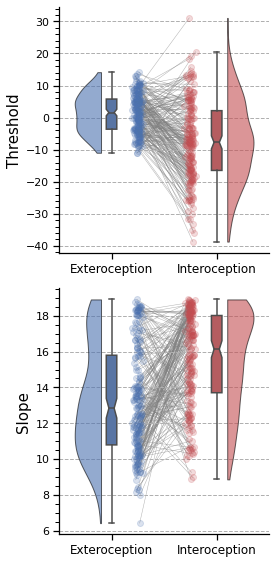

In [7]:
plot_parameters(
    df=behavior_df[(behavior_df.Session=='Del1') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='SupplementaryMaterial1_parameters_del1')

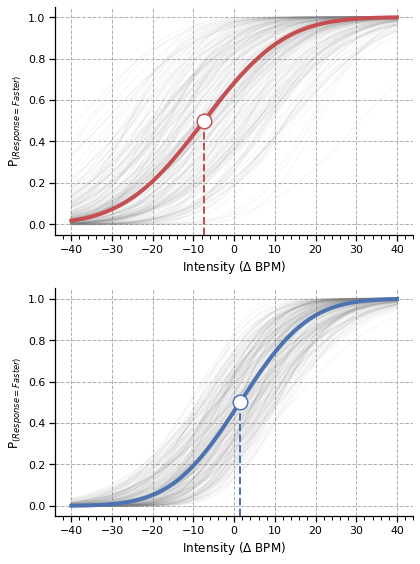

In [8]:
plot_psychometricFunctions(
    df=behavior_df[(behavior_df.Session=='Del1') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='SupplementaryMaterial1_functions_del1')

In [9]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='Threshold', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,9.898257,205.0,two-sided,3.952701e-19,1.206e+16,0.903579


In [10]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='Slope', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,-7.864385,205.0,two-sided,2.084145e-13,3.069e+10,-0.805265


## Session 2

In [11]:
print(f'n Session 2 = {behavior_df[(behavior_df.Session=="Del2") & (~behavior_df["Slope"].isnull())].Subject.nunique()}')

n Session 2 = 191


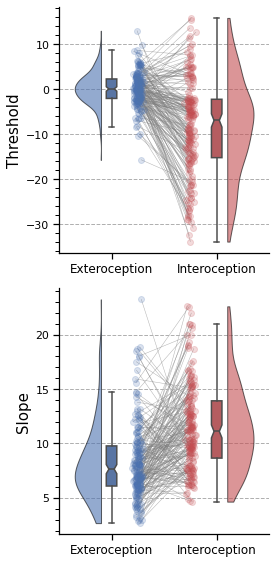

In [12]:
plot_parameters(
    df=behavior_df[(behavior_df.Session=='Del2') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='SupplementaryMaterial1_parameters_del2')

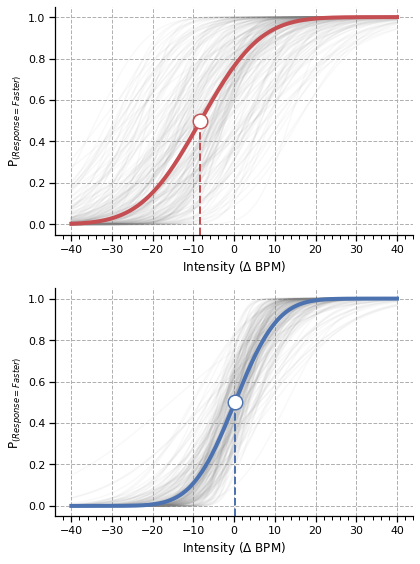

In [13]:
plot_psychometricFunctions(
    df=behavior_df[(behavior_df.Session=='Del2') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='SupplementaryMaterial1_functions_del2')

In [14]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='Threshold', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,11.661283,190.0,two-sided,4.747802e-24,8.31e+20,1.065909


In [15]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='Slope', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,-8.926768,190.0,two-sided,3.726936e-16,1.501e+13,-0.868123


# Psychometric parameters - post hoc Bayesian estimates

## Session 1

In [16]:
del1 = pd.read_csv(os.path.join(outputpath, 'Del1_psychophysics.txt'))
print(f'n Session 1 = {del1.Subject.nunique()}')

n Session 1 = 206


In [17]:
def plot_parameters(df, title):
    fig, axs = plt.subplots(2, 1, figsize=(4, 8), sharey='row')

    for i, metric in enumerate(['BayesianThreshold', 'BayesianSlope']):
        raincloud(data=df, x='Modality', y=metric, ax=axs[i], levels=['Extero', 'Intero'], palette=['#4c72b0', '#c44e52'])
        labels = [item.get_text() for item in axs[i].get_xticklabels()]
        labels[1] = 'Interoception'
        labels[0] = 'Exteroception'
        axs[i].set_xticklabels(labels, size=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', axis='y',linestyle='--')
        axs[i].tick_params(axis='x', which='minor', bottom=False)

    axs[1].set_ylabel('Slope', size=15)
    axs[0].set_ylabel('Threshold', size=15)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=300)

In [18]:
def plot_psychometricFunctions(df, title):

    fig, axs = plt.subplots(2, 1, figsize=(6, 8))
    for i, modality, col in zip((0, 1), ['Intero', 'Extero'], ['#c44e52', '#4c72b0']):
        threshold, slope = [], []
        for subject in df.Subject.unique():
            threshold.append(df.BayesianThreshold[(df.Modality == modality) & (df.Subject == subject)].values)
            slope.append(df.BayesianSlope[(df.Modality == modality) & (df.Subject == subject)].values)

            # Plot Psi estimate of psychometric function
            axs[i].plot(np.linspace(-40, 40, 500), 
                    (norm.cdf(np.linspace(-40, 40, 500), loc=threshold[-1], scale=slope[-1])),
                    '-', color='gray', alpha=.05)
            axs[i].set_ylabel('P$_{(Response=Faster)}$', size=12)
            axs[i].set_xlabel('Intensity ($\Delta$ BPM)', size=12)
        axs[i].plot(np.linspace(-40, 40, 500), 
                (norm.cdf(np.linspace(-40, 40, 500), loc=np.array([threshold]).mean(), scale=np.array([slope]).mean())),
                '-', color=col, linewidth=4)
        axs[i].axvline(x=np.array([threshold]).mean(), ymin=0, ymax=0.5, linestyle='--', color=col, linewidth=2)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color=col, markersize=15)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color='w', markersize=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', linestyle='--')
        axs[i].tick_params(axis='y', which='minor', left=False)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=600)

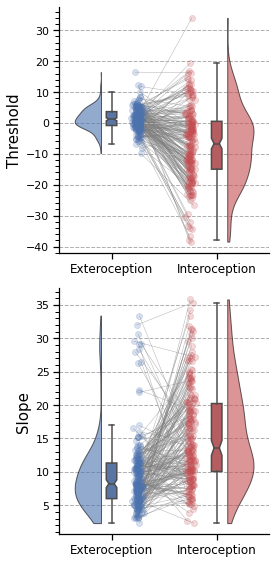

In [19]:
plot_parameters(
    df=del1,
    title='Fig2Parameters')

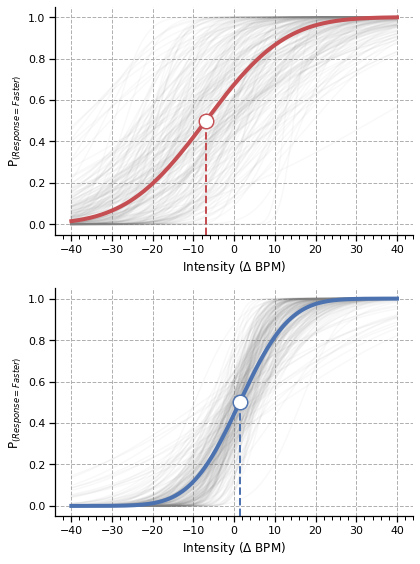

In [20]:
plot_psychometricFunctions(
    df=del1,
    title='Fig2Functions')

In [21]:
degrees_freedom = del1[del1.Modality=='Intero'].Subject.nunique() - 1
sample_mean = del1[del1.Modality=='Intero'].BayesianThreshold.mean()
sample_standard_error = sem(del1[del1.Modality=='Intero'].BayesianThreshold.to_numpy())
confidence_interval = t.interval(0.95, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(-8.635284905510582, -5.314326744974855)

In [22]:
pg.pairwise_ttests(data=del1, subject='Subject', dv='BayesianThreshold', within='Modality', effsize='cohen', return_desc=True)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,1.363267,3.590899,-6.974806,12.087805,True,True,9.891671,205.0,two-sided,4.132753e-19,1.155e+16,0.935124


In [23]:
degrees_freedom = del1[del1.Modality=='Intero'].Subject.nunique() - 1
sample_mean = del1[del1.Modality=='Intero'].BayesianSlope.mean()
sample_standard_error = sem(del1[del1.Modality=='Intero'].BayesianSlope.to_numpy())
confidence_interval = t.interval(0.95, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(14.350826321362662, 16.346309600967437)

In [24]:
pg.pairwise_ttests(data=del1, subject='Subject', dv='BayesianSlope', within='Modality', effsize='cohen', return_desc=True)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,9.585364,5.609934,15.348568,7.263269,True,True,-9.056454,205.0,two-sided,1.074750e-16,4.977e+13,-0.888085


## Session 2

In [25]:
del2 = pd.read_csv(os.path.join(outputpath, 'Del2_psychophysics.txt'))
print(f'n Session 2 = {del2.Subject.nunique()}')

n Session 2 = 191


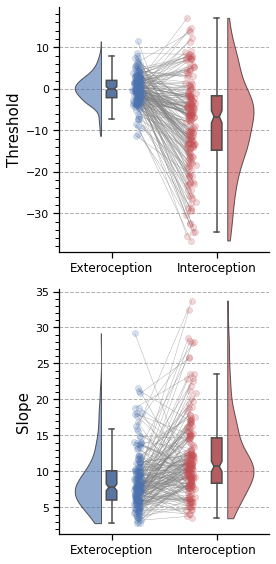

In [26]:
plot_parameters(
    df=del2,
    title='SupplementaryMaterial5_Del2PsiParameters')

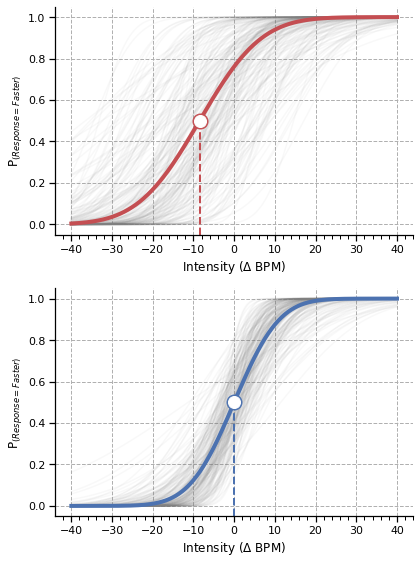

In [27]:
plot_psychometricFunctions(
    df=del2,
    title='SupplementaryMaterial5_Del2PsiFunctions')

### Threshold

In [52]:
pg.compute_bootci(x=del2[del2.Modality=='Intero'].BayesianThreshold.to_numpy(), func='mean')

array([-10.06,  -6.92])

In [51]:
pg.compute_bootci(x=del2[del2.Modality=='Extero'].BayesianThreshold.to_numpy(), func='mean')

array([-0.47,  0.52])

In [29]:
pg.pairwise_ttests(data=del2, subject='Subject', dv='BayesianThreshold', within='Modality', effsize='cohen', return_desc=True)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,0.008995,3.490174,-8.508325,11.129,True,True,11.158633,190.0,two-sided,1.463749e-22,2.857e+19,1.03274


### Slope

In [55]:
pg.compute_bootci(x=del2[del2.Modality=='Intero'].BayesianSlope.to_numpy(), func='mean')

array([11.22, 12.74])

In [56]:
pg.compute_bootci(x=del2[del2.Modality=='Extero'].BayesianSlope.to_numpy(), func='mean')

array([8.14, 9.28])

In [57]:
pg.pairwise_ttests(data=del2, subject='Subject', dv='BayesianSlope', within='Modality', effsize='cohen', return_desc=True)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,8.690387,4.035314,11.967581,5.58317,True,True,-7.29421,190.0,two-sided,7.913760e-12,9.121e+08,-0.672781


# Session * Condition ANOVA

In [32]:
del1['Session'] = 'Del1'
del2['Session'] = 'Del2'
session_df = del1.append(del2)

In [33]:
for sub in session_df.Subject.unique():
    if session_df[session_df.Subject == sub].BayesianThreshold.isnull().any():
        session_df = session_df[session_df.Subject!=sub]
    if len(session_df[session_df.Subject == sub].BayesianThreshold)<4:
        session_df = session_df[session_df.Subject!=sub]

In [34]:
session_df.Subject.nunique()

179

In [35]:
pg.rm_anova(data=session_df, subject='Subject', dv='BayesianThreshold', within=['Session', 'Modality'])

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Session,542.977936,1,178,542.977936,13.208399,3.645270e-04,3.645270e-04,0.069079,1.0
1,Modality,12371.814006,1,178,12371.814006,127.539341,1.199310e-22,1.199310e-22,0.417424,1.0
2,Session * Modality,18.362255,1,178,18.362255,0.605135,4.376584e-01,4.376584e-01,0.003388,1.0


In [36]:
pg.rm_anova(data=session_df, subject='Subject', dv='BayesianSlope', within=['Session', 'Modality'])

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Session,885.043053,1,178,885.043053,31.275291,8.309311e-08,8.309311e-08,0.149446,1.0
1,Modality,3520.361093,1,178,3520.361093,106.299152,7.711638e-20,7.711638e-20,0.373899,1.0
2,Session * Modality,260.531008,1,178,260.531008,9.466727,2.423046e-03,2.423046e-03,0.050498,1.0


In [37]:
pg.pairwise_ttests(data=session_df, subject='Subject', dv='BayesianSlope', within=['Modality', 'Session'], effsize='cohen', return_desc=True)

,Contrast,Modality,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,-,Extero,Intero,9.214000,3.956602,13.648729,4.744129,True,True,-10.310148,178.0,two-sided,7.711638e-20,6.152e+16,-1.015242
1,Session,-,Del1,Del2,12.543162,4.758704,10.319567,3.620317,True,True,5.592432,178.0,two-sided,8.309311e-08,1.223e+05,0.525921
2,Modality * Session,Extero,Del1,Del2,9.722581,5.814725,8.705419,4.078591,True,True,2.199734,178.0,two-sided,2.911390e-02,0.875,0.202531
3,Modality * Session,Intero,Del1,Del2,15.363743,7.292985,11.933715,5.339340,True,True,5.357704,178.0,two-sided,2.582845e-07,4.131e+04,0.536675


# Correlation between psi and Bayesian fit

In [38]:
sns.set_context('talk')

## Session 1

### Threshold

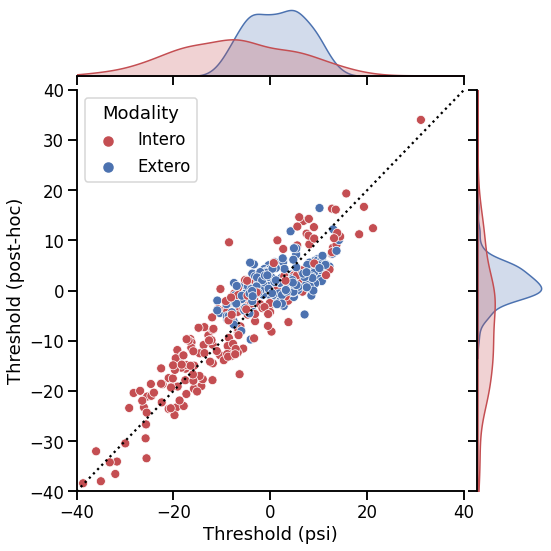

In [39]:
g = sns.jointplot(data=del1,
                  x='Threshold', y='BayesianThreshold', hue='Modality', xlim=(-40, 40),
                  ylim=(-40, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/SupplementaryMaterial2_Threshold1.svg', dpi=300)

In [40]:
pg.corr(x=del1[del1.Modality=='Extero'].Threshold,
        y=del1[del1.Modality=='Extero'].BayesianThreshold, method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,206,0.639768,"[0.55, 0.71]",0.409303,0.403483,4.138262e-25,1.088e+22,1.0


In [41]:
pg.corr(x=del1[del1.Modality=='Intero'].Threshold,
        y=del1[del1.Modality=='Intero'].BayesianThreshold, method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,206,0.927867,"[0.91, 0.94]",0.860938,0.859567,2.433141e-89,3.052e+85,1.0


## Slope

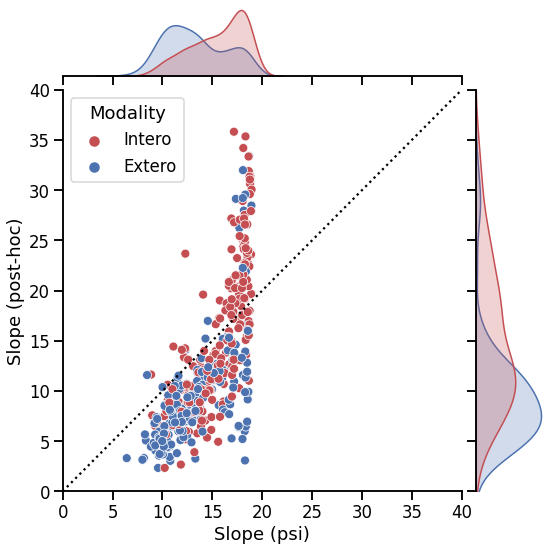

In [42]:
g = sns.jointplot(data=del1,
                  x='Slope', y='BayesianSlope', hue='Modality', xlim=(0, 40),
                  ylim=(0, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/SupplementaryMaterial2_Slope1.svg', dpi=300)

In [43]:
pg.corr(x=del1[del1.Modality=='Extero'].Slope,
        y=del1[del1.Modality=='Extero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,206,0.698407,"[0.62, 0.76]",0.487773,0.482726,1.842847e-31,1.0


In [44]:
pg.corr(x=del1[del1.Modality=='Intero'].Slope,
        y=del1[del1.Modality=='Intero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,206,0.800348,"[0.75, 0.84]",0.640556,0.637015,3.284693e-47,1.0


## Session 2

### Threshold

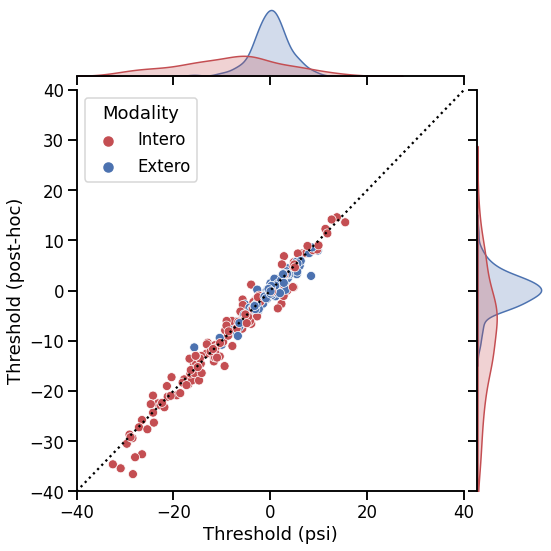

In [45]:
g = sns.jointplot(data=del2,
                  x='Threshold', y='BayesianThreshold', hue='Modality', xlim=(-40, 40),
                  ylim=(-40, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/SupplementaryMaterial2_Threshold2.svg', dpi=300)

In [46]:
pg.corr(x=del2[del2.Modality=='Extero'].Threshold,
        y=del2[del2.Modality=='Extero'].BayesianThreshold, method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,154,0.96572,"[0.95, 0.97]",0.932615,0.931722,6.255026e-91,7.467e+86,1.0


In [47]:
pg.corr(x=del2[del2.Modality=='Intero'].Threshold,
        y=del2[del2.Modality=='Intero'].BayesianThreshold, method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,147,0.983033,"[0.98, 0.99]",0.966355,0.965887,1.071345e-108,2.247e+104,1.0


## Slope

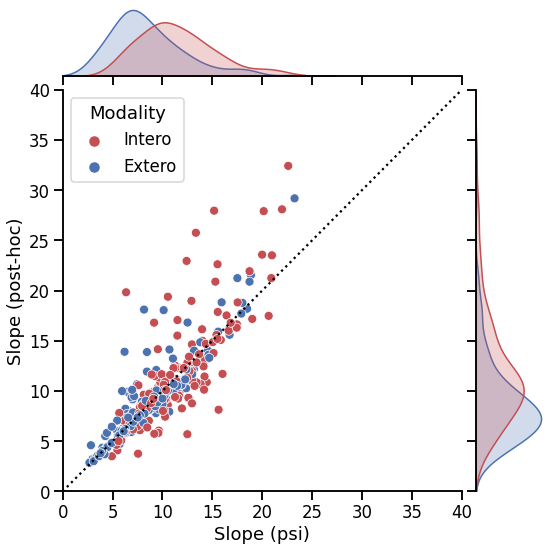

In [48]:
g = sns.jointplot(data=del2,
                  x='Slope', y='BayesianSlope', hue='Modality', xlim=(0, 40),
                  ylim=(0, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/SupplementaryMaterial2_Slope2.svg', dpi=300)

In [49]:
pg.corr(x=del2[del2.Modality=='Extero'].Slope,
        y=del2[del2.Modality=='Extero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,154,0.905386,"[0.87, 0.93]",0.819724,0.817336,2.014196e-58,1.0


In [50]:
pg.corr(x=del2[del2.Modality=='Intero'].Slope,
        y=del2[del2.Modality=='Intero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,147,0.784861,"[0.71, 0.84]",0.616007,0.610674,6.128016e-32,1.0
